# Tutorial 1: Hamiltonian dynamics

## Physics 7810, Spring 2020

## T1.1 - Discrete-time solution of Hamilton's equations: the simple harmonic oscillator

In the first lecture, I introduced several simple discrete-time integration algortithms for Hamilton's equations of motion, including the Euler, symplectic Euler, and velocity Verlet (or leapfrog) methods. In this tutorial, you will test these methods for solving the equations of motion for a system with a known exact solution, the 1D simple harmonic oscillator (SHO).

The instantaneous state of the 1D SHO at time $t$ corresponds to a point in the 2D *phase space* ($x(t)$,$p(t)$), where $x$ is the displacement and $p = m \dot{x}$ is the conjugate momentum. In terms of $x$ and $p$, the Hamiltonian of the 1D SHO is:

$$H(p,x) = \frac{p^2}{2m} + \frac{k x^2}{2},$$

where $m$ is the mass and $k$ is the spring constant. This leads to Hamilton's equations of motion,

$$\dot{x} = \frac{\partial H}{\partial p} = \frac{p}{m}$$

$$\dot{p} = - \frac{\partial H}{\partial x} = - k x.$$

These two first-order ODEs can be combined to obtain a single second-order ODE, $m \ddot{x} = - k x$,
which has the general solution

$$x(t) = A \sin(\omega t + \delta)$$

$$p(t) = A m \omega \cos(\omega t + \delta),$$

where $\omega = \sqrt{k/m}$ is the angular frequency of the oscillator. The period of oscillation is $T = 2 \pi / \omega = 2 \pi \sqrt{m/k}$.

It's instructive and convenient to formulate this problem (simple as it is) in dimensionless variables. It's natural to take $m$ to be the unit of mass, and $t_0 = \sqrt{m/k}$ to be the unit of time. To proceed further, we note that the energy of the system, $E = H(p,x)$, is a constant of the motion, which can be taken to be the unit of energy, so the unit of length is $x_0 = \sqrt{E/k}$ and the unit of momentum is $p_0 = \sqrt{E m}$.

We now define the dimensionless position $X = x / x_0 = x / \sqrt{E / k}$ and the dimensionless momentum $P = p / p_0 = p / \sqrt{E m}$. Making this variable substitution in the Hamiltonian then gives

$${\cal H}(P,X) = \frac{1}{2} P^2 + \frac{1}{2} X^2,$$

where we have defined the dimensionless Hamiltonian ${\cal H}(P,X) = H(P,X) / E = 1$. It can be verified that $P$ and $X$ are still canonically conjugate variables in this new formulation.

Hamilton's equations of motion now become

$$\dot{X} = \frac{\partial \cal{H}}{\partial P} = P$$

$$\dot{P} = - \frac{\partial \cal{H}}{\partial X} = - X,$$

where the dots now indicate differentiation with respect to the dimensionless time variable $\tau = t / t_0$. These equations have solution

$$X(\tau) = \sqrt{2} \sin(\tau + \delta)$$

$$P(\tau) = \sqrt{2} \cos(\tau + \delta).$$

Note that the constant of integration is determined from the constraint ${\cal H}(P,X) = 1$. As a function of $\tau$, the system traces out a circular path of unit diameter in the $(X,P)$ phase space, with angular frequency $1$ and period $2 \pi$. This is as simple as it gets: the only remaining free parameter in the model is the phase angle $\delta$, which determines the initial condition at $\tau = 0$.

The purpose of this rather tedious exercise is not only to facilitate the subsequent analysis, but to illustrate the importance of introducing an appropriate, minimal set of dimensionless parameters prior to theoretical study or numerical simulation of any physical system. There's no need to investigate how the behavior of the SHO varies with $m$ or $k$ or $E$, as all SHOs map into the unique dimensionless model described above. This is a theme we will return to repeatedly over the course of the semester.

Now consider discrete-time solutions of Hamilton's equations for the SHO:

$$\frac{d X}{d t} = P$$

$$\frac{d P}{d t} = -X$$

(note that I'm now using $t$ instead of $\tau$ to denote the dimensionless time variable). Writing discrete-time approximations for the derivatives,

$$\frac{d X}{d t} \approx \frac{\Delta X}{\Delta t} = \frac{X(t + \Delta t) - X(t)}{\Delta t} = P(t)$$

$$\frac{d P}{d t} \approx \frac{\Delta P}{\Delta t} = \frac{P(t + \Delta t) - P(t)}{\Delta t} = - X(t),$$

leads immediately to the Euler algorithm,

$$X(t + \Delta t) = X(t) + P(t) \Delta t$$

$$P(t + \Delta t) = P(t) - X(t) \Delta t.$$

Note that both the position and momentum are updated simultaneously in the Euler scheme.

Write a Python program to integrate the equations of motion of the SHO over several periods of oscillation using the Euler integrator, and plot the phase-space trajectory of the system as a function of $t$ in the $(X,P)$ plane. Also plot the total energy $E = {\cal H}(P,X)$ as a function of $t$. Compare these results with the exact solution, and explore the behavior as a function of the timestep $\Delta t$. Do you recover the exact dynamics for sufficiently small $\Delta t$?

### Solution:
The followings are the primary methods used to solve the problems in this tutorial.

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib import rc

rc('font', **{
    'family': 'sans-serif',
    'sans-serif': ['DejaVu Sans'],
    'size': 10
})
# Set the font used for MathJax - more on this later
rc('mathtext', **{'default': 'regular'})
plt.rc('font', family='serif')

class SHO_integrators:
    
    def __init__(self):
        # attributes related to the exact solution
        self.t = np.linspace(0, 4*np.pi, 100) 
        self.x_exact = np.sqrt(2) * np.sin(self.t)
        self.p_exact = np.sqrt(2) * np.cos(self.t)
        self.E_exact = 0.5 * np.power(self.x_exact, 2) + 0.5 * np.power(self.p_exact, 2)
        
    def integrators(self, integrator, x_0=0, p_0=np.sqrt(2), n=500, dt=0.01*np.pi*4, reverse=False):
        self.integrator = integrator
        self.n = n
        
        if reverse is False:
            self.dt = dt
        elif reverse is True:
            self.dt = -dt
        
        x_approx, p_approx = [x_0], [p_0]

        for i in range(self.n):
            if self.integrator == 'Euler':
                x_approx.append(x_approx[-1] + p_approx[-1] * self.dt)
                # note that at this point x_approx[-1] is the value that was appended now
                p_approx.append(p_approx[-1] - x_approx[-2] * self.dt)
            elif self.integrator == 'symplectic Euler':
                x_approx.append(x_approx[-1] + p_approx[-1] * self.dt)  # same as Euler
                p_approx.append(p_approx[-1] - x_approx[-1] * self.dt)
            elif self.integrator == 'Verlet':
                p_half = p_approx[-1] - x_approx[-1] * (self.dt) / 2
                x_approx.append(x_approx[-1] + p_half * self.dt)
                p_approx.append(p_half - x_approx[-1] * (self.dt) / 2)
            else:
                print('Error: Invalid integrator! Available options are:')
                print('"Euler", "symplectic Euler", and "Verlet".')
                break

        return x_approx, p_approx        
        

    def SHO_plots(self, x_approx, p_approx, energy=True):
        E_approx = 0.5 * np.power(x_approx, 2) + 0.5 * np.power(p_approx, 2)
        # Plotting: phase-space trajectory
        plt.figure()
        _, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
        plt.suptitle('Phase-space trajectory of 1D simple harmonic oscillators')

        plt.subplot(1, 2, 1)
        plt.plot(self.x_exact, self.p_exact)
        plt.xlabel('Dimensionless position')
        plt.ylabel('Dimensionless momentum')
        plt.title('Exact solution')
        plt.grid()

        plt.subplot(1, 2, 2)
        plt.plot(x_approx, p_approx, '*')
        plt.xlabel('Dimensionless position')
        plt.ylabel('Dimensionless momentum')
        plt.title('Approximation by %s scheme' % self.integrator)
        plt.grid()

        if energy is True:
            # Plotting: the total energy as a function of time
            plt.figure()
            _, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
            plt.suptitle('The total energy as a function of time')

            plt.subplot(1, 2, 1)
            plt.plot(self.t, self.E_exact)
            plt.xlabel('Time')
            plt.ylabel('Dimensionless total energy')
            plt.title('Exact solution')
            plt.grid()

            plt.subplot(1, 2, 2)
            plt.plot(np.arange(len(E_approx)) * self.dt, E_approx, '*')
            plt.xlabel('Time')
            plt.ylabel('Dimensionless total energy')
            if max(abs(E_approx)) >= 10000:
                plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
            plt.title('Approximation by %s scheme' % self.integrator)
            plt.grid()
            
    def SHO_plots_reverse(self, x_forward, p_forward, x_backward, p_backward):
        plt.figure()
        _, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
        plt.suptitle('Examination of time-reversibility')

        plt.subplot(1, 2, 1)
        plt.plot(x_forward, self.E_exact)
        plt.xlabel('Time')
        plt.ylabel('Dimensionless total energy')
        plt.title('Exact solution')
        plt.grid()

        plt.subplot(1, 2, 2)
        plt.plot(np.arange(len(E_approx)) * self.dt, E_approx, '*')
        plt.xlabel('Time')
        plt.ylabel('Dimensionless total energy')
        if max(abs(E_approx)) >= 10000:
            plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        plt.title('Approximation by %s scheme' % self.integrator)
        plt.grid()

#### Problem 1 of T1.1: the phase-space trajectory of 1D simple harmonic oscillators and the total energy as a function of time

<Figure size 432x288 with 0 Axes>

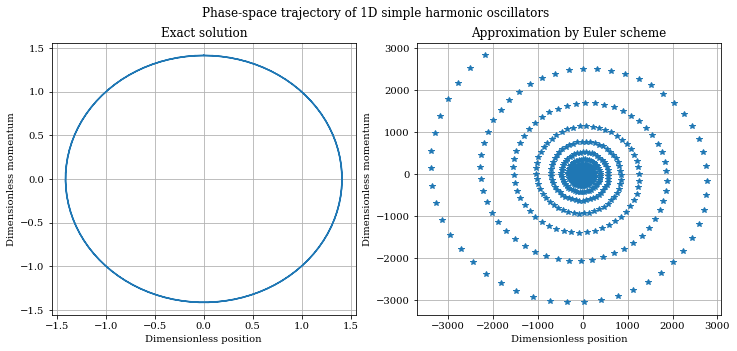

<Figure size 432x288 with 0 Axes>

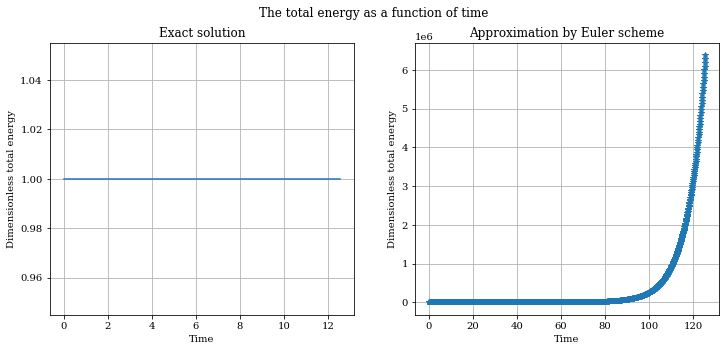

In [2]:
SI = SHO_integrators()
x_approx, p_approx = SI.integrators('Euler', n=1000, dt=0.01 * np.pi * 4)
SI.SHO_plots(x_approx, p_approx)

As shown above, clearly Euler scheme is not stable enough. While the exact solution of the phase-space trajectory is a circle, the approximation by Euler scheme is a spiral, which was resulted from a circle with a ever-increasing radius. On the other hand, the magnitude of the total energy is related to the radius of the phase-space trajectory $r(t)$ at time $t$ given that the total energy at time $t + \Delta t$ can be expressed as

\begin{equation}
E(t + \Delta t) = \frac{1}{2}X^{2}(t + \Delta t) + \frac{1}{2}P^{2}(t + \Delta t) = \frac{1}{2}[X(t) + P(t) \Delta t]^{2} + \frac{1}{2}[P(t) - X(t) \Delta t]^{2} = \frac{1}{2}(X^{2}(t) + P^{2}(t))(1 + \Delta t^{2})=\frac{1}{2}r^{2}(t)(1 + \Delta t^{2})
\end{equation}
From the equation above, we can tell that as a result of increasing radius in the phase-space plot, the total energy approximated by Euler scheme diverges to infinity (both $r(t)$ and $\Delta t$ are increasing). 

To further prove this mathmetically, we can substitute the initial conditions ($X(0)=0, P(0)=\sqrt{2}, r(0)=\sqrt{2}$) to the equation and express the total energy at $t=\Delta t$ (the second time frame):
\begin{equation}
E(2 \Delta t) = \frac{1}{2}r^{2}(\Delta t)(1 + \Delta t^{2})=\frac{1}{2}(X^2({\Delta t})+P^2({\Delta t}))(1 + \Delta t^{2})
\end{equation}
Note that 
\begin{equation}
X(t+\Delta t) = X(t) + P(t) \Delta t \Rightarrow X(\Delta t) = X(0) + P(0) \Delta t = 0 + \sqrt{2} \Delta t \\
P(t + \Delta t) = P(t) - X(t) \Delta t \Rightarrow P(\Delta t) = P(0) - X(0)\Delta t = \sqrt{2}
\end{equation}
Therefore, 
\begin{equation}
r^{2}(\Delta t) = (\sqrt{2} \Delta t)^{2} + (\sqrt{2})^{2} = 2(1 + \Delta t^2)
\end{equation}
By substitution of $r^{2}(\Delta t)$, we have
\begin{equation}
E(2 \Delta t) = \frac{1}{2}\cdot 2(1 + \Delta t^2)(1 + \Delta t^{2}) = (1 + \Delta t^{2})^{2}
\end{equation}
Finally, we can see that the total energy at the $n$-th time step ($t = n \Delta t$) is 
\begin{equation}
E(n) = (1 + \Delta t^{2})^{n}
\end{equation}
which indicates that the total energy increases exponentially with the number of time steps (hence the time).
Reversely, it can also be shown that the trajectory is a spiral whose radius also increases exponentially:
\begin{equation}
E(n)=\frac{1}{2}(X^{2}(n)+P^{2}(n)) \Rightarrow X^{2}(n)+P^{2}(n) = 2E(n) = 2(1 + \Delta t^{2})^{n}
\end{equation}


#### Problem 2 of T1.1: discussion about different $\Delta t$

<Figure size 432x288 with 0 Axes>

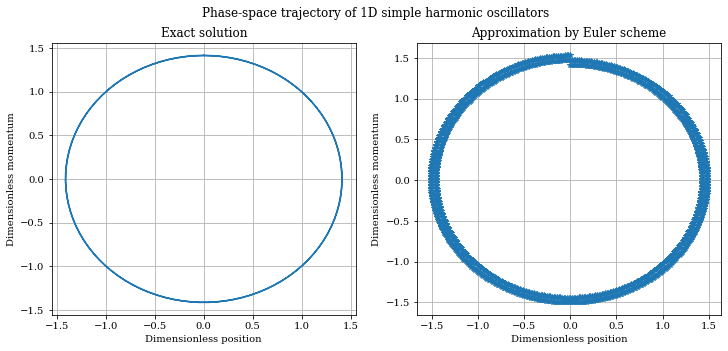

<Figure size 432x288 with 0 Axes>

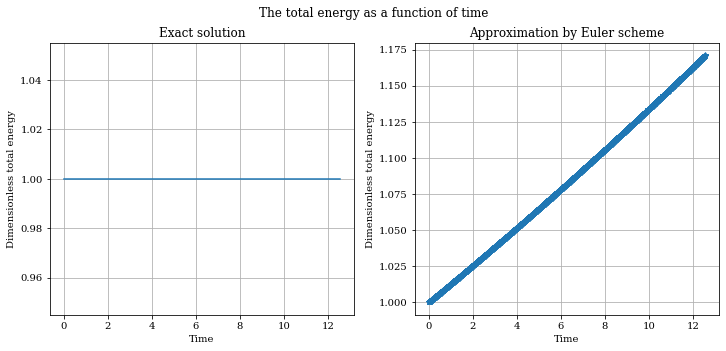

In [3]:
# Here we use a dt that is 10 times smaller than the original one
x_approx, p_approx = SI.integrators('Euler', n=1000, dt=0.001*np.pi*4)
SI.SHO_plots(x_approx, p_approx)

As shown above, with a time step that is ten times smaller than the previous one, Euler scheme is able to provide a better approximation, which corresponds to a lower increasing rate of the radius in the phase-space trajectory plot, hence a slower divergence in the total energy approximation. This can also be observed from the equations derived above. Since the characteristics of Euler shceme remains the same, we certainly need an better algorithm that is still robust enough even if a large number of steps is given.

## T1.2 - The symplectic Euler algorithm

Now investigate the discrete-time integration of the equations of motion for the 1D SHO using the symplectic Euler algorithm,

$$X(t + \Delta t) = X(t) + P(t) \Delta t$$

$$P(t + \Delta t) = P(t) - X(t + \Delta t) \Delta t.$$

Note that, unlike the Euler algorithm, this method involves a specific sequence of operations: first, the position is updated using the momentum at time $t$, then the momentum is updated using the new position (and the corresponding force $-X$) at time $t + \Delta t$.

Write a Python program to integrate the equations of motion of the SHO over several periods of oscillation using the symplectic Euler integrator, and plot the phase-space trajectory and total energy of the system as a function of $t$. Compare these results with the exact solution, and explore the behavior as a function of the timestep $\Delta t$. How does the dynamics differ from that of the exact solution? Does the discrete-time dynamics display a well-defined period, and if so, is it equal to $2 \pi$?

#### Problem 1 of T1.2: the phase-space trajectory of 1D simple harmonic oscillators and the total energy as a function of time

<Figure size 432x288 with 0 Axes>

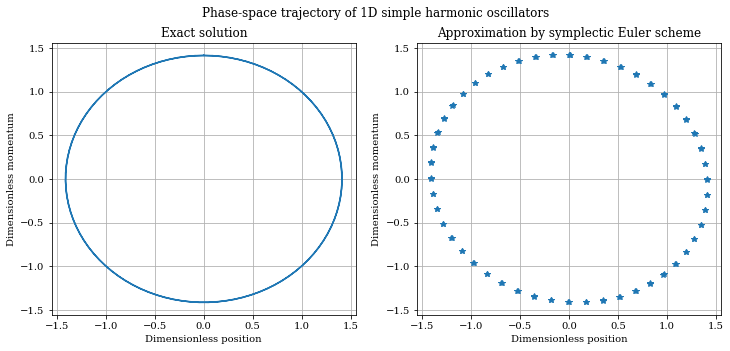

<Figure size 432x288 with 0 Axes>

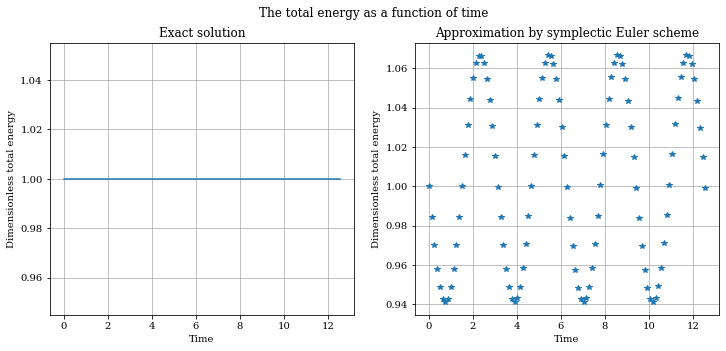

In [4]:
x_approx, p_approx = SI.integrators(integrator='symplectic Euler', n=100)
SI.SHO_plots(x_approx, p_approx)

Rather than update the position and momentum at the same time as Euler scheme, symplectic Euler scheme updates the position first and use the updated position to update the momentum, which makes the quality of approximation better. As shown above, the approximation of the phase-space trajectory is closer to the exact solution compared to Euler scheme, but slightly elliptical. As for the total energy of the system, symplectic Euler scheme also has  a better performance than Euler scheme such that the total energy oscillates around the exact value ($E=1$) with a moderate amplitude of oscillation. Note that the amplitudes of the waves above and below the x-axis are actually slightly different. This difference would be smaller if smaller time step is used. Due to this difference, averaging the value of the total energy over a long period will slightly overestimate the true total energy, with the deviation being approximately half of the amplitude of the upper waves. 

#### Problem 2 of T1.2: discussion about different $\Delta t$

<Figure size 432x288 with 0 Axes>

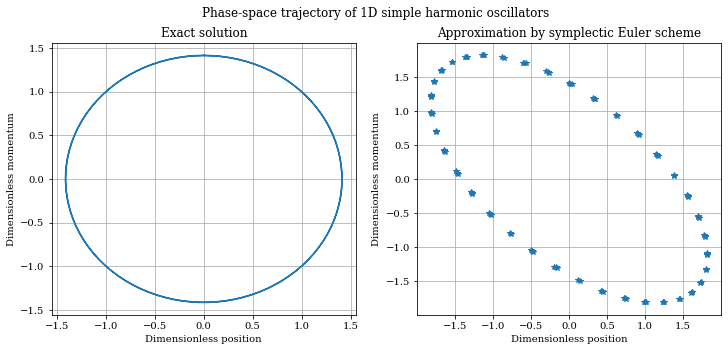

<Figure size 432x288 with 0 Axes>

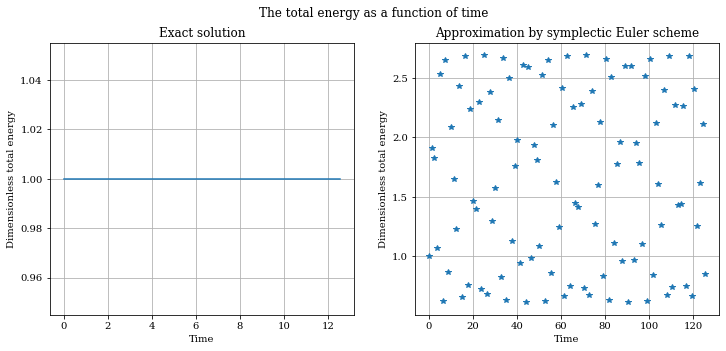

In [5]:
x_approx, p_approx = SI.integrators(integrator='symplectic Euler', n=100, dt=0.1*np.pi*4)
SI.SHO_plots(x_approx, p_approx)

As shown above, with a time step that is ten times larger than the previous one, the estimated phase-space trajectory would be more elliptical, which corresponds to a larger oscillation in the total energy. In addition, the period of the osillation becomes smaller, while the extent of overestimation gets larger. (Note: the discrete-time dynamics in this case displays a well-defined period but is not equal to $2 \pi$.)

## T1.3 - The velocity Verlet algorithm

Finally, investigate the discrete-time integration of the equations of motion for the 1D SHO using the velocity Verlet (or leapfrog) algorithm,

$$P \left(t + \frac{\Delta t}{2} \right) = P(t) - X(t) \frac{\Delta t}{2}$$

$$X(t + \Delta t) = X(t) + P \left(t + \frac{\Delta t}{2} \right) \Delta t$$

$$P(t + \Delta t) = P \left(t + \frac{\Delta t}{2} \right) - X(t + \Delta t) \frac{\Delta t}{2}.$$

As for the symplectic Euler algorithm, a specific sequence of operations is implied here: first a half-timestep update of momentum using the initial force $- X(t)$, then a full-timestep update of the position using the midstep momentum $P(t + \Delta t/2)$, and finally a half-timestep update of the momentum using the final force $- X(t + \Delta t)$.

Write a Python program to integrate the equations of motion of the SHO over several periods of oscillation using the velocity Verlet integrator, and plot the phase-space trajectory and total energy of the system as a function of $t$. Compare these results with the exact solution, and explore the behavior as a function of the timestep $\Delta t$. Is the velocity Verlet method stable? Is the energy well-conserved over large time intervals? What happens if you make the timestep large compared with the period of the SHO?

The symmetric structure of the velocity Verlet algorithm implies that it is time-reversible. Verify this directly by integrating the SHO forward in time over some finite (large) time interval, then reversing the momentum and integrating forward in time over the same time interval. You should arrive back at the same phase space point, to a high degree of precision. In the same way, show that the symplectic Euler algorithm is *not* time reversible (even though it is rather stable).

#### Problem 1 of T1.3: the phase-space trajectory of 1D simple harmonic oscillators and the total energy as a function of time

<Figure size 432x288 with 0 Axes>

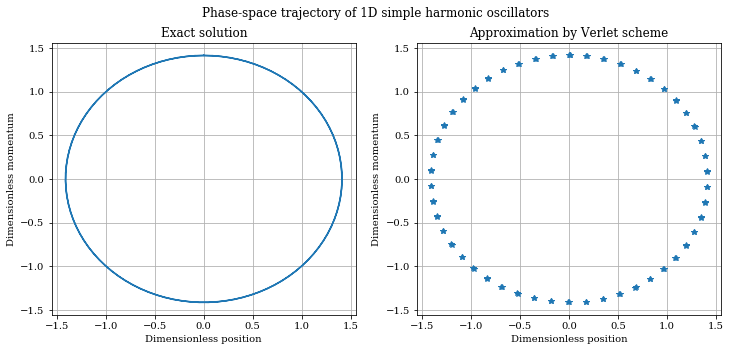

<Figure size 432x288 with 0 Axes>

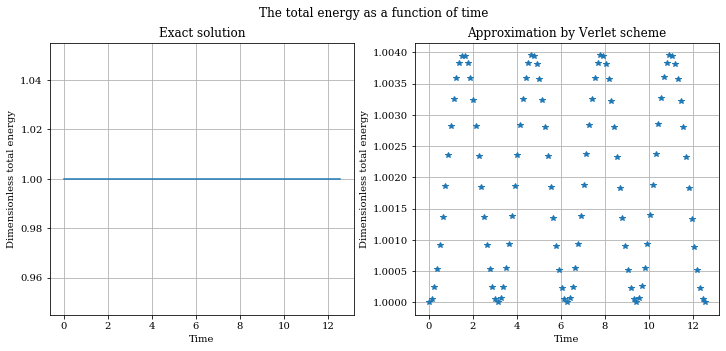

In [6]:
x_approx, p_approx = SI.integrators(integrator='Verlet', n = 100)
SI.SHO_plots(x_approx, p_approx)

As shown above, the phase-space trajectory is visually the same as the exact solution, and the estimated energy (which oscillates with small amplitudes) is well-conserved over large time intervals, which indicates that the algorithm is stable. Compared with Euler scheme and symplectic Euler scheme with the same time step, Verlet algorithm certainly provides much better estimates. This implies that with a more robust algorithm such as Verlet algorithm, we are able acquire the same level of accuracy as other algorithms by using a larger time step, which is particularly beneficial to performing a long simulation that is computationally expensive.

#### Problem 2 of T1.3: discussion of $\Delta t$

<Figure size 432x288 with 0 Axes>

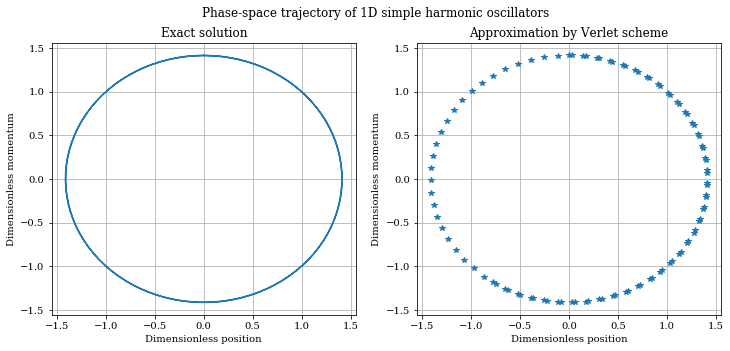

<Figure size 432x288 with 0 Axes>

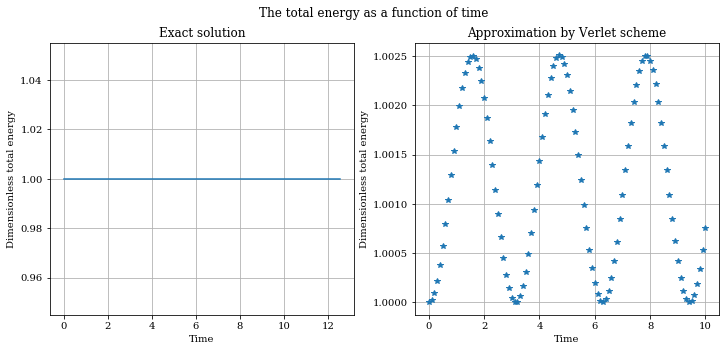

In [7]:
x_approx, p_approx = SI.integrators(integrator='Verlet', n = 100, dt=0.1)
SI.SHO_plots(x_approx, p_approx)

As shown above, similar to symplectic Euler scheme, larger time steps lead to a shorter period of oscillation if Verlet algorithm is used. Note that the oscillation is not around the true value 1, but above the true value. As verified in the class, this is dependent on the initial conditions used. 

#### Problem 3 of T1.3: Examination of time reversibility of Euler scheme and symplectic Euler scheme

To get the expression of a "reverse integrator", just substitute $\Delta t$ with $(- \Delta t)$:
- Euler scheme
- Symplectic Euler scheme

<Figure size 432x288 with 0 Axes>

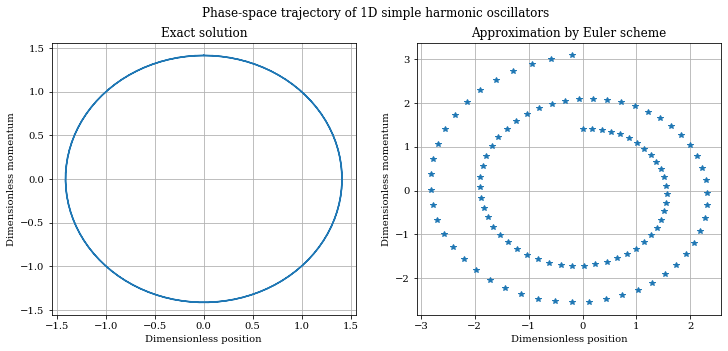

<Figure size 432x288 with 0 Axes>

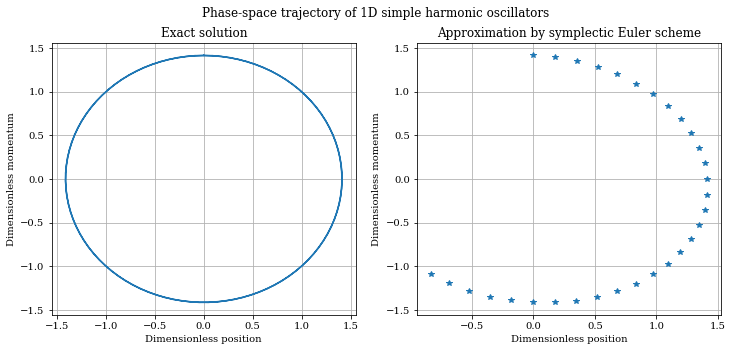

In [10]:
# Euler 
x_euler, p_euler = SI.integrators(integrator='Euler', n = 100, dt=0.01 * np.pi * 4)
SI.SHO_plots(x_euler, p_euler, False)
# Euler 
x_s_euler, p_s_euler = SI.integrators(integrator='symplectic Euler', n = 30, dt=0.01 * np.pi * 4)
SI.SHO_plots(x_s_euler, p_s_euler, False)

<Figure size 432x288 with 0 Axes>

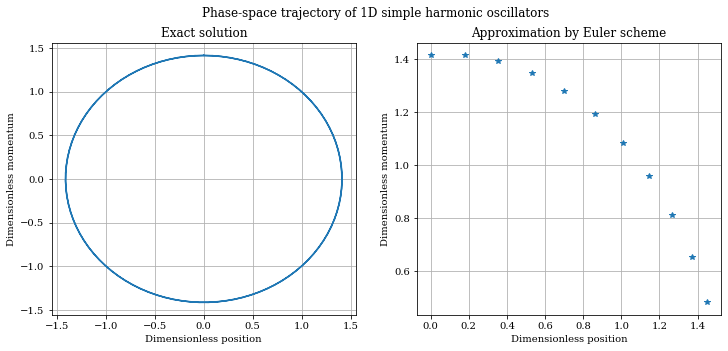

<Figure size 432x288 with 0 Axes>

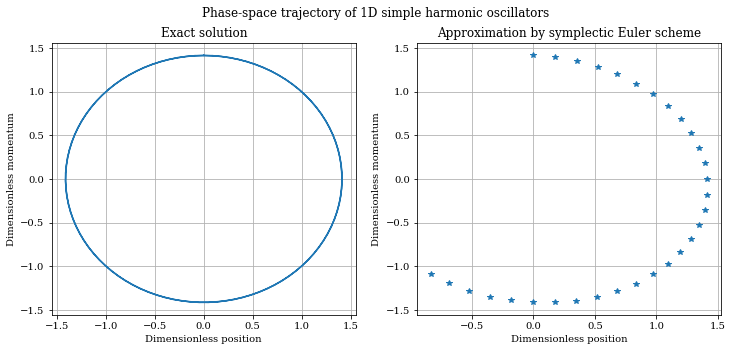

In [9]:
SI = SHO_integrators()
# Euler 
x_euler, p_euler = SI.integrators(integrator='Euler', n = 10, dt=0.01 * np.pi * 4)
SI.SHO_plots(x_euler, p_euler, False)
# Euler 
x_s_euler, p_s_euler = SI.integrators(integrator='symplectic Euler', n = 30, dt=0.01 * np.pi * 4)
SI.SHO_plots(x_s_euler, p_s_euler, False)